In [179]:
import numpy as np
import pandas as pd

In [180]:
#storing the dataset in df
df=pd.read_csv('data.csv')

In [181]:
#display first 5 rows from df
df.head()

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed
4,4,5,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed


In [182]:
#to display random rows from the df
df.sample(5)

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
2545,2545,2546,8.3,1,3,1,7,4.3,Yes,Yes,55,67,1,NotPlaced
1740,1740,1741,7.5,1,2,0,8,4.4,Yes,Yes,69,82,2,NotPlaced
2854,2854,2855,8.5,2,3,0,8,4.8,Yes,Yes,82,70,0,Placed
4780,4780,4781,8.2,2,3,2,7,4.8,Yes,Yes,83,83,0,Placed
4595,4595,4596,7.5,1,1,0,7,4.3,No,Yes,71,69,3,NotPlaced


In [183]:
#get the shape of the df
df.shape

(10000, 14)

In [184]:
#check for null values and duplicate values 
df.isnull().sum()

Unnamed: 0                    0
StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
dtype: int64

In [185]:
df.fillna(0,inplace=True)

In [186]:
df.duplicated().sum()

0

**EDA**


In [187]:
#checking the number of people placed and not placed 
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

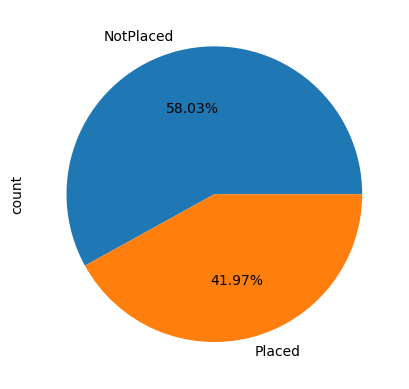

In [188]:
df['PlacementStatus'].value_counts().plot(kind='pie',autopct='%.2f%%')

**DATA PREPROCESSING**

**ENCODING CATEGORICAL DATA**

In [189]:
df['Internship']=df['Internship'].map({'Yes':1,'No':0})
df['Hackathon']=df['Hackathon'].map({'Yes':1,'No':0})
df['PlacementStatus']=df['PlacementStatus'].map({'Placed':1,'NotPlaced':0})


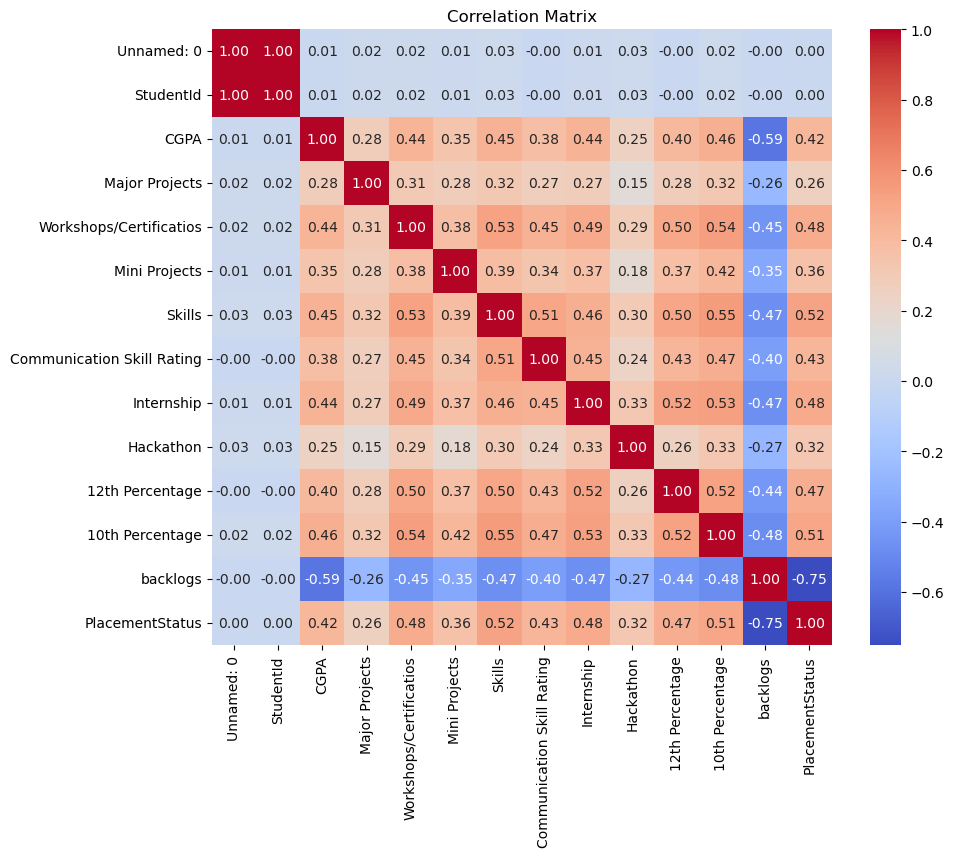

In [190]:
#finding correlation of columns with the output column(placement status)
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()



In [233]:
#DROPPING columns that will that have less correlation value(w.r.t placement status) and will not add much value in the prediction system
x=df.drop(['Unnamed: 0','StudentId','PlacementStatus'],axis=1)

In [234]:
y=df['PlacementStatus']

In [235]:
x

,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs
0,7.5,1,1,1,6,4.4,0,0,61,79,2
1,8.9,0,3,2,9,4.0,1,1,78,82,0
2,7.3,1,2,2,8,4.8,1,0,79,80,2
3,7.5,1,1,2,8,4.4,1,1,81,80,0
4,8.3,1,2,2,8,4.5,1,1,74,88,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,7,3.9,1,0,85,66,4
9996,7.4,0,1,0,9,4.8,0,0,84,67,1
9997,8.4,1,3,0,7,4.8,1,1,79,81,0
9998,8.9,0,3,2,8,4.8,1,1,71,85,0


In [236]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64

In [237]:
y.values

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

**TRAIN TEST SPLIT**

In [238]:
#Splitting the dataset into training and testing 
from sklearn.model_selection import train_test_split

In [239]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [240]:
#Train the model using all the classification algorithim, the one with best accuracy will be chosen
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [241]:
#MODEL TRAINING-->creating an instance and training models on the training set
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)



RandomForestClassifier()

In [242]:
#PREDICTING ON TEST DATA 
y_pred1=lr.predict(X_test)
y_pred2=svm_model.predict(X_test)
y_pred3=knn.predict(X_test)
y_pred4=dt.predict(X_test)
y_pred5=rf.predict(X_test)



In [243]:
#EVALUATING THE ALGORITHMS--> for classification problems always use accuracy score to evaluate model's performance
from sklearn.metrics import accuracy_score

In [244]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [245]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
                         'ACC':[score1*100,
                                score2*100,
                                score3*100,
                                score4*100,
                                score5*100,
                                ]})

In [246]:
final_data

,Models,ACC
0,LR,91.878788
1,SVC,84.272727
2,KNN,86.000000
3,DT,91.212121
4,RF,93.636364


In [247]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

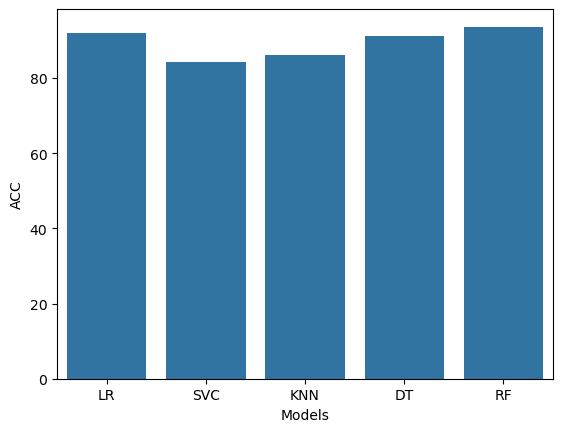

In [248]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [249]:
#Amongst all the classifiers random forest classifiers has the best accuracy so we will choose rf
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [260]:
#testing model on sample data
sample_data = pd.DataFrame({
    'CGPA': 8.4,
    'Major Projects': 2,
    'Workshops/Certificatios': 3,
    'Mini Projects': 2,
    'Skills': 5,
    'Communication Skill Rating': 4.0,
    'Internship': 1,
    'Hackathon': 1,
    '12th Percentage': 88,
    '10th Percentage': 90,
    'backlogs': 0
},index=[0])


In [261]:
p=rf.predict(sample_data)
if p==1:
    print('Placed')
else:
    print('Not Placed')

Placed


In [268]:
sample_data1 = pd.DataFrame({
    'CGPA': 5.8,                         
    'Major Projects': 0,                
    'Workshops/Certificatios': 0,     
    'Mini Projects': 0,                
    'Skills': 1,                        
    'Communication Skill Rating': 2,   
    'Internship': 0,                    
    'Hackathon': 0,                    
    '12th Percentage': 60,              
    '10th Percentage': 58,             
    'backlogs': 3                   
},index=[0])


In [269]:
p=rf.predict(sample_data1)
if p==1:
    print('Placed')
else:
    print('Not Placed')

Not Placed


In [270]:
#saving the model
import pickle


In [274]:
pickle.dump(rf, open('prediction_model.pkl', 'wb'))